**Content**
1.  Objective
2.  Details on data
3.  Data visualization
4.  Building the model 
5.  Testing the model accuracy

## 1. Objective
The aim of this study is to determine whether a patient is susceptible to developing diabetes or not through the use of the KNN classification algorithm by incorporating various medical measurements obtained from the National Institute of Diabetes and Digestive and Kidney Diseases dataset.

## 2. Details on data

* **Pregnancies :** To express the Number of pregnancies

* **Glucose :** To express the Glucose level in blood

* **BloodPressure :** To express the Blood pressure measurement

* **SkinThickness :** To express the thickness of the skin

* **Insulin :** To express the Insulin level in blood

* **BMI :** To express the Body mass index

* **DiabetesPedigreeFunction :** To express the Diabetes percentage

* **Age :** To express the age

* **Outcome :** To express the final result 1 is Yes and 0 is No

#### Necessary imports

In [1]:
# Dataset manipulation
import numpy as np 
import pandas as pd 
import math
pd.plotting.register_matplotlib_converters()

# Plotting the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model building
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Results testing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/diabetes-dataset/diabetes.csv


#### Importing the dataset

In [2]:
dataset_path='/kaggle/input/diabetes-dataset/diabetes.csv'
diab_data= pd.read_csv(dataset_path)

## 3. Data visualization

**Observation :**
Based on the plot below, it can be observed that the study population mostly comprises individuals in their 20s, and those who have been diagnosed with diabetes are predominantly in their 30s.

Text(0.5, 1.0, 'Age destribution of the patients and their outcome')

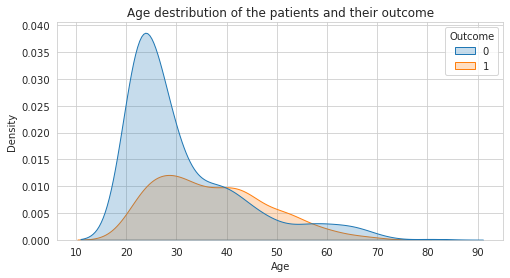

In [3]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
# KDE plots for 
sns.kdeplot(data=diab_data,x='Age',hue='Outcome',shade=True)
#In case you're not familiar with KDE plots, you can think of it a method for visualizing the distribution of observations in a dataset, analogous to a histogram.
plt.title("Age destribution of the patients and their outcome")

**Theory :**
Intuitively, one might think that the level of insulin in the blood would be a sufficient factor to determine whether a patient has diabetes or not, except that the following graph proves otherwise.

Text(0.5, 1.0, 'Insulin level in blood per patient')

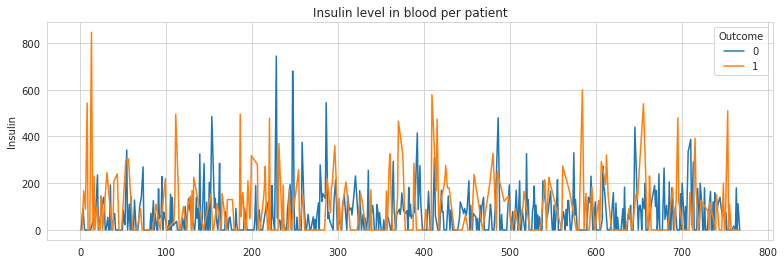

In [4]:
plt.figure(figsize=(13,4))
sns.set_style("whitegrid")
sns.lineplot(data=diab_data,x=diab_data.index,y='Insulin',hue='Outcome')
plt.title("Insulin level in blood per patient")

**Observation:**
We can observe that the level of insulin in the blood does not have a significant impact on determining if a patient is diabetic or not. In this study, we will try to identify the most crucial features in this dataset. 

## 4. Building the model

### Data preprocessing

In [5]:
# Detecting missing values
diab_data.isnull().any()

# Verifying that all the columns have a numerical type (so that we don't need any kind of encoder)
for i in diab_data.columns:
    print(diab_data[i].dtype)

#Defining the Target column
y=diab_data.Outcome 

#Defining the Features 
X=diab_data.drop(['Outcome'],axis=1)

int64
int64
int64
int64
int64
float64
float64
int64
int64


### Model

The number of neighbors in a KNN model is an important hyperparameter that can affect the model's performance. A common approach for selecting this hyperparameter is to use a rule of thumb, which suggests setting the number of neighbors to approximately the square root of the number of samples in the training set.

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

print('The training part contains '+str(X_train.size)+' rows')
print('The validation part contains '+str(X_valid.size)+' rows')

model = KNeighborsClassifier(n_neighbors=round(math.sqrt(X_train.size)))
model.fit(X_train,y_train)


The training part contains 4912 rows
The validation part contains 1232 rows


KNeighborsClassifier(n_neighbors=70)

## 5. Testing the model accuracy

#### Computing MAE

In [7]:
mae = mean_absolute_error(model.predict(X_valid),y_valid)
print(mae)

0.21428571428571427


### Cross-validation

**Observation :**
We can clearly notice that the way we split our training/validation sets has a considerable impact on the model performance

MAE scores:
 [0.24675325 0.28571429 0.31168831 0.2987013  0.25974026 0.22077922
 0.32467532 0.20779221 0.22368421 0.23684211]
The average MAE score is 0.26, and the best score is 0.21


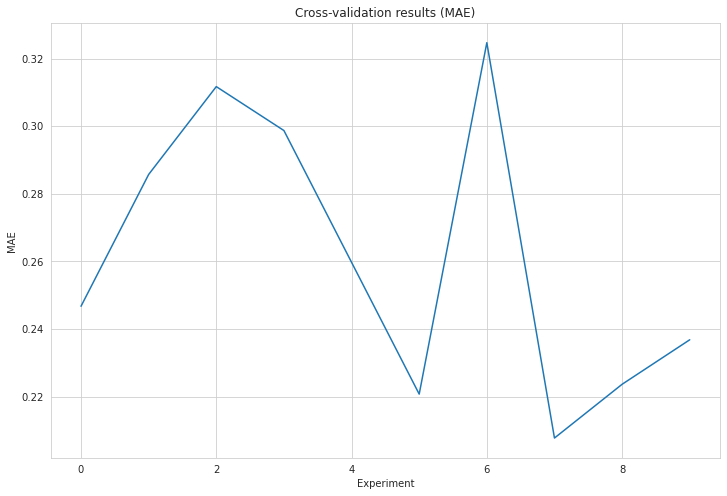

In [8]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(model, X, y,
                              cv=10,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("The average MAE score is "+str(round(scores.mean(),2))+", and the best score is "+str(round(scores.min(),2)))

plt.figure(figsize=(12,8))
plt.plot(scores)
plt.title("Cross-validation results (MAE)")
plt.ylabel('MAE')
plt.xlabel('Experiment')
plt.show()

**Conclusion :**
In the context of a medical phenomenon, it is crucial to have highly accurate models for making predictions and decisions. While a mean absolute error (MAE) of 0.21 (with a maximum possible value of 1) might be considered acceptable in some fields or applications, it may still be considered high for medical purposes.